In [1]:
!pip install fastai opendatasets pandas

In [3]:
import pandas as pd
import opendatasets as od
from fastai.text.all import *

od.download("https://www.kaggle.com/competitions/word2vec-nlp-tutorial/")


100%|██████████| 51.7M/51.7M [00:01<00:00, 29.3MB/s]



Extracting archive ./word2vec-nlp-tutorial/word2vec-nlp-tutorial.zip to ./word2vec-nlp-tutorial


In [4]:
!unzip /content/word2vec-nlp-tutorial/labeledTrainData.tsv.zip
train = pd.read_csv("/content/labeledTrainData.tsv", header=0,\
delimiter="\t", quoting=3)
train.head()

Archive:  /content/word2vec-nlp-tutorial/labeledTrainData.tsv.zip
  inflating: labeledTrainData.tsv    


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<b..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \""critics\"" look only to criticize everyth..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack ..."
3,"""3630_4""",0,"""It must be assumed that those who praised this film (\""the greatest filmed opera ever,\"" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It's questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is \""about\"" should be a..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening sequences somewhat give the false impression that we're dealing with a serious and harrowing drama, but you need not fear because barely ten minutes later we're up until our necks in nonsensical chainsaw battles, rough fist-fights, lurid dialogs and gratuitous nudity! Bo and Ingrid are two orphaned siblings with an unusually close and even slightly perverted relationship. Can you imagine playfully ripping off the towel that covers your sister's naked body and then stare at her unshaven genitals..."


In [5]:
train['review'] = train['review'].str.replace('<br />', '')

In [6]:
train.head()


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Vi..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \""critics\"" look only to criticize everyth..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwhile some youngsters enter in the restricted area of the security center and are attacked by a pack ..."
3,"""3630_4""",0,"""It must be assumed that those who praised this film (\""the greatest filmed opera ever,\"" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.It's questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is \""about\"" should be allowed anywh..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening sequences somewhat give the false impression that we're dealing with a serious and harrowing drama, but you need not fear because barely ten minutes later we're up until our necks in nonsensical chainsaw battles, rough fist-fights, lurid dialogs and gratuitous nudity! Bo and Ingrid are two orphaned siblings with an unusually close and even slightly perverted relationship. Can you imagine playfully ripping off the towel that covers your sister's naked body and then stare at her unshaven genitals..."


In [7]:
dls = TextDataLoaders.from_df(train,
                              seed = 123456456,
                              text_col = "review",
                              label_col = "sentiment")
dls.show_batch()

,text,category
0,"xxbos "" * * attention xxunk of all , let me say that xxmaj rob xxmaj roy is one of the best films of the 90 's . xxmaj it was an amazing achievement for all those involved , especially the acting of xxmaj liam xxmaj neeson , xxmaj jessica xxmaj lange , xxmaj john xxmaj hurt , xxmaj brian xxmaj cox , and xxmaj tim xxmaj roth . xxmaj michael xxmaj canton xxmaj jones painted a wonderful portrait of the honor and dishonor that men can represent in themselves . xxmaj but alas … it constantly , and unfairly gets compared to "" braveheart "" . xxmaj these are two entirely different films , probably only similar in the fact that they are both about xxmaj scots in historical xxmaj scotland . xxmaj yet , this comparison frequently bothers me because it seems to be almost assumed that """,1
1,"xxbos "" titanic directed by xxmaj james xxmaj cameron presents a fictional love story on the historical setting of the xxmaj titanic . xxmaj the plot is simple , xxunk , or not for those who love plots that twist and turn and keep you in suspense . xxmaj the end of the movie can be figured out within minutes of the start of the film , but the love story is an interesting one , however . xxmaj kate xxmaj winslett is wonderful as xxmaj rose , an aristocratic young lady betrothed by xxmaj cal ( billy xxmaj zane ) . xxmaj early on the voyage xxmaj rose meets xxmaj jack ( leonardo dicaprio ) , a lower class artist on his way to xxmaj america after winning his ticket aboard xxmaj titanic in a poker game . xxmaj if he wants something , he goes and gets it",1
2,"xxbos "" xxrep 3 * xxmaj warning - this review contains "" plot spoilers , "" though nothing could "" spoil "" this movie any more than it already is . xxmaj it really xxup is that bad . xxrep 3 * xxmaj before i begin , xxmaj i 'd like to let everyone know that this definitely is one of those so - incredibly - bad - that - you - fall - over - laughing movies . xxmaj if you 're in a lighthearted mood and need a very hearty laugh , this is the movie for you . xxmaj now without further ado , my review : this movie was found in a bargain bin at wal - mart . xxmaj that should be the first clue as to how good of a movie it is . xxmaj secondly , it stars the lame action - star",0
3,"xxbos "" the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with the oddest possible scenarios to get the two protagonists together in the end . xxmaj in fact , all its charm is innate , contained within the characters and the setting and the plot … which is highly believable to boot . xxmaj it 's easy to think that such a love story , as beautiful as any other ever told , * could * happen to you … a feeling you do n't often get from other romantic comedies",1
4,"xxbos "" director xxmaj douglas xxmaj sirk once said ` there 's a very short distance between high art and trash , and trash that contains craziness is by this very quality nearer to art ' . xxmaj this statement defines his cinema perfectly , a very unique body of work that includes classic stage adaptations , adventure and war films , westerns and of course , his famous xxunk 's melodramas were , as the very word signifies , dramas with music . xxmaj the music sets the tone for his masterful style , and every stroke of his brush ( sirk was also a painter ) leaves a powerful image on the screen - turned - canvas . xxmaj but this ai n't life but its representation , an imitation of life . xxmaj sirk never tried to show reality , on the contrary . xxmaj none of",1
5,"xxbos "" my xxmaj comments for xxup vivah : - xxmaj its a charming , idealistic love story starring xxmaj shahid xxmaj kapoor and xxmaj amrita xxmaj rao . xxmaj the film takes us back to small pleasures like the bride and bride

In [8]:
from fastai.callback.tracker import EarlyStoppingCallback
early_stop_cb = EarlyStoppingCallback(monitor = "valid_loss",
                                      patience=3)
learn = text_classifier_learner(dls,
                                AWD_LSTM,
                                drop_mult=0.3,
                                metrics=accuracy,
                                loss_func=CrossEntropyLossFlat(),
                                wd = 0.01,
                                cbs = early_stop_cb)

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device)


SuggestedLRs(valley=0.00363078061491251)

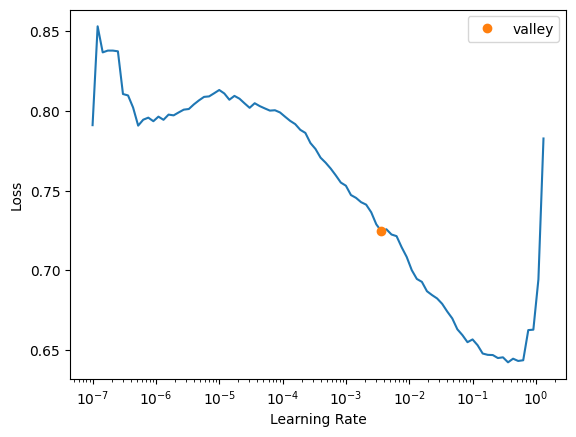

In [9]:
learn.lr_find()

In [10]:
learn.fine_tune(10, 0.0036)

epoch,train_loss,valid_loss,accuracy,time
0,0.428778,0.393710,0.825000,01:44


epoch,train_loss,valid_loss,accuracy,time
0,0.344662,0.295042,0.881400,04:31
1,0.285517,0.271011,0.885800,04:31
2,0.248883,0.243630,0.905800,04:31
3,0.212035,0.226347,0.913000,04:31
4,0.166140,0.235040,0.914800,04:30
5,0.109106,0.283757,0.911000,04:31
6,0.074855,0.300511,0.915600,04:31


No improvement since epoch 3: early stopping


In [11]:
learn.show_results()

,text,category,category_
0,"xxbos "" match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules of the match , both opponents have to go through tables in order to get the win . xxmaj benoit and xxmaj guerrero heated up early on by taking turns hammering first xxmaj spike and then xxmaj bubba xxmaj ray . a xxmaj german suplex by xxmaj benoit to xxmaj bubba took the wind out of the xxmaj dudley brother . xxmaj spike tried to help his brother , but the referee restrained him while xxmaj benoit and xxmaj guerrero",1,1
1,"xxbos "" raising xxmaj victor xxmaj vargas : a xxunk know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of oatmeal . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj victor xxmaj vargas became i was always aware that something did n't quite feel right . xxmaj victor xxmaj vargas suffers from a certain xxunk on the director 's part . xxmaj apparently , the director thought that the ethnic backdrop of a xxmaj latino family on the lower east side , and an idyllic storyline would make the film critic proof . xxmaj he was right , but it did n't fool me . xxmaj raising xxmaj victor xxmaj vargas is the story about a",0,0
2,"xxbos "" this movie was recently released on xxup dvd in the xxup us and i finally got the chance to see this hard - to - find gem . xxmaj it even came with original theatrical previews of other xxmaj italian horror classics like "" xxunk "" and "" beyond xxup the xxup darkness "" . xxmaj unfortunately , the previews were the best thing about this movie . xxunk 3 "" in a bizarre way is actually linked to the infamous xxmaj lucio xxmaj fulci "" zombie "" franchise which began in 1979 . xxmaj similarly compared to "" zombie "" , "" zombi 3 "" consists of a threadbare plot and a handful of extremely bad actors that keeps this ' horror ' trash barely afloat . xxmaj the gore is nearly non - existent ( unless one is frightened of people running around with green moss",0,0
3,"xxbos "" here are the matches . . . ( adv . = xxunk xxmaj warriors ( ultimate xxmaj warrior , xxmaj texas xxmaj tornado and xxmaj legion of xxmaj doom ) v xxmaj the xxmaj perfect xxmaj team ( mr xxmaj perfect , xxmaj ax , xxmaj smash and xxmaj crush of xxmaj demolition ): xxmaj ax is the first to go in seconds when xxmaj warrior splashes him for the pin ( 4 - 3 adv . xxmaj warriors ) . i knew xxmaj ax was n't a healthy man but if he was that unhealthy why bother have him on the card ? xxmaj this would be his last xxup ppv . xxmaj eventually , both xxmaj legion of xxmaj doom and xxmaj demolition job out cheaply via double disqualification ( 2 - 1 adv . xxmaj warriors ) . xxmaj perfect applies the xxmaj perfect xxmaj",0,1
4,"xxbos "" the premise of this movie has been tickling my imagination for quite some time now . xxmaj we 've all heard or read about it in some kind of con - text . xxmaj what would you do if you were all alone in the world ? xxmaj what would you do if the entire world suddenly disappeared in front of your eyes ? xxmaj in fact , the last part is actually what happens to xxmaj dave and xxmaj andrew , two room - mates living in a run - down house in the middle of a freeway system . xxmaj andrew is a nervous wreck to say the least and xxmaj dave is considered being one of the biggest losers of society . xxmaj that alone is the main reason to why these two guys get so well along , because they simply only have each",1,1
5,"xxbos "" i have never seen any of xxmaj spike xxmaj lee 's prior films , as their trailers never caught my interest . i have seen , and admire x

In [12]:
learn.save("review_censor")

Path('models/review_censor.pth')

In [13]:
# Для теста показываю ей фрагмент отзыва на фильм Аватар, взятый из интернета
learn.predict("The main character, Jack Sally, is a disabled navy who has just come back from the war. The film starts with the scene when he is invited to take part in a secret expedition to the planet, inhabited by weird creatures. Thus, he becomes the part of the programme called Avatar. Being turned into a a three-metre giant with blue skin")

('1', tensor(1), tensor([0.0060, 0.9940]))